##TEAM  ModelMinds
##Members
1. Partha Pratim Bhowmick
2. Shubhojeet Chatterjee
3. Himani Malhotra
4. Harshal Yeola
5. Jeevan Ram
6. Arpita Kundu

##Capstone Project Description
###Title
**"Enhancing Defect Detection in Manufacturing Using Feature Selection, SMOTE, and Random Forest"**

**Overview**
In modern manufacturing, ensuring product quality and minimizing defects is critical for reducing costs and maintaining customer satisfaction. However, datasets collected from manufacturing processes are often imbalanced, with far fewer defective samples compared to non-defective ones. This **imbalance** makes it difficult for standard machine learning models to accurately detect rare but critical defects.

This project proposes a data-driven approach that integrates **feature selection, Synthetic Minority Oversampling Technique (SMOTE), and Random Forest classifiers** to improve the detection of defective products in manufacturing.

###Objectives
To preprocess and analyze manufacturing quality datasets containing both defective and non-defective product records.

To identify the most influential process parameters through feature selection.

To apply SMOTE for balancing the dataset by generating synthetic defective samples.

To build and train a Random Forest classifier for defect prediction.

To evaluate the model using metrics suited for imbalanced datasets (precision, recall, F1-score, ROC-AUC).

##Methodology
###Data Preprocessing:

Cleaning and preparing manufacturing data.

Handling missing values, scaling features, and splitting into training/validation/testing sets.

###Feature Selection:

Applying statistical and model-based feature selection to identify key process variables influencing defects.

###Imbalance Handling:

Using SMOTE to oversample defective cases, ensuring balanced representation of both classes.

###Model Development:

Training and optimizing a Random Forest classifier to detect defects.

###Evaluation:

Assessing results with accuracy, precision, recall, F1-score, emphasizing improvement in detecting defective items.

###Expected Outcomes
A predictive model capable of identifying defective products more accurately than baseline approaches.

A ranked list of critical manufacturing parameters influencing product quality.

Demonstration that combining feature selection + SMOTE + Random Forest significantly improves defect detection in imbalanced manufacturing data.

##Tools & Technologies
Python: Pandas, NumPy, Scikit-learn, Imbalanced-learn, Matplotlib/Seaborn

Jupyter Notebook: for experimentation and documentation

Manufacturing dataset: containing process measurements and defect labels

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#load data from drive Data/00_Data.xlsx
df = pd.read_excel('/content/drive/MyDrive/data/00_Data.xlsx')

#remove NA rows
df = df.dropna()

y = df['DEFECTIVE']
X = df.drop('DEFECTIVE', axis=1)

## Apply SelectKBest for feature selection


In [44]:
# Apply SelectKBest with f_classif to select the best K features
def select_k_best_features(X, y, k_f):
  selector = SelectKBest(score_func=f_classif, k=k_f)
  X_selected = selector.fit_transform(X, y)

  # Prepare DataFrame with Feature Names and Scores
  feature_scores_df = pd.DataFrame({
      'Feature': X.columns,
      'Score': selector.scores_
  })

  # Get selected feature names
  selected_feature_names = X.columns[selector.get_support()]

  #short values based in score
  feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

  # ---- Plotting ----
  plt.figure(figsize=(10, 6))
  plt.barh(feature_scores_df['Feature'], feature_scores_df['Score'], color="orange")
  plt.xlabel("F-score")
  plt.ylabel("Features")
  plt.title("Feature Importance (SelectKBest - ANOVA F-test)")
  plt.gca().invert_yaxis()  # highest score at the top
  plt.tight_layout()
  plt.show()

  return X_selected, feature_scores_df


## RandomForest Classifier model
RandomForest Classifier to classify the defective vs Non-Defective.

In [45]:
# Classification using RandomForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def model_randomforest(X, y, test_size=0.2, random_state=42):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # RandomForest Classifier
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  # Prediction & Evaluation
  y_pred = model.predict(X_test)
  print("\nClassification Report RandomForest:")
  print(classification_report(y_test, y_pred))
  return confusion_matrix(y_test, y_pred)


## Select 10 Best Features

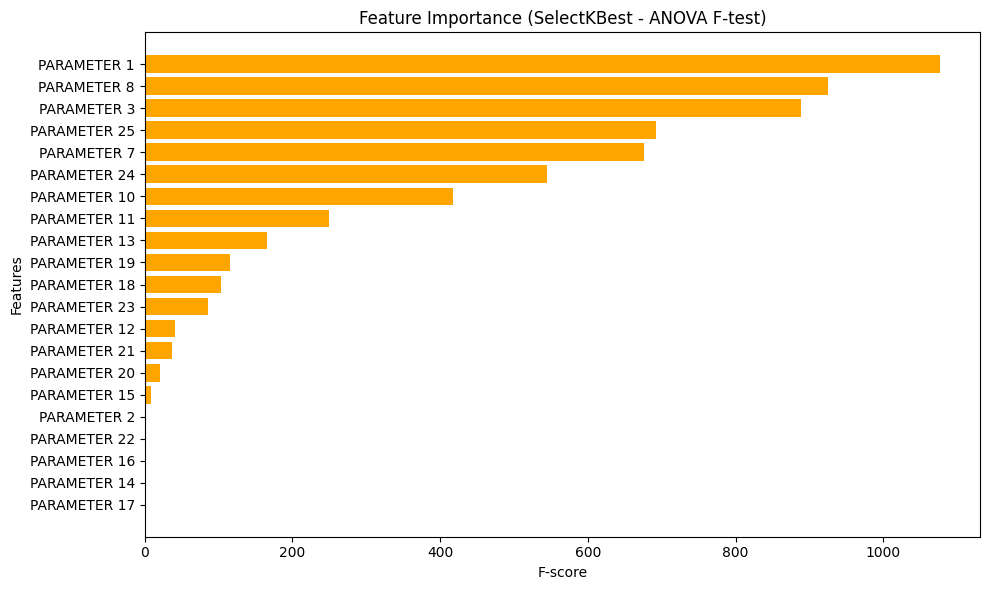

In [46]:
x_selected, _ = select_k_best_features(X, y, k_f=10)


##Run the classifier

In [50]:
cm_before = model_randomforest(x_selected, y)


Classification Report RandomForest:
              precision    recall  f1-score   support

   DEFECTIVE       0.69      0.55      0.61       586
          NO       0.93      0.96      0.94      3466

    accuracy                           0.90      4052
   macro avg       0.81      0.75      0.78      4052
weighted avg       0.89      0.90      0.89      4052




##Augment the data with SMOTE.
##Run RandomForest after SMOTE

In [48]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x_selected, y)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_smote).value_counts())
#
cm_after = model_randomforest(X_smote, y_smote)



Class distribution after SMOTE:
DEFECTIVE
NO           17371
DEFECTIVE    17371
Name: count, dtype: int64

Classification Report RandomForest:
              precision    recall  f1-score   support

   DEFECTIVE       0.93      0.94      0.94      3469
          NO       0.94      0.93      0.94      3480

    accuracy                           0.94      6949
   macro avg       0.94      0.94      0.94      6949
weighted avg       0.94      0.94      0.94      6949



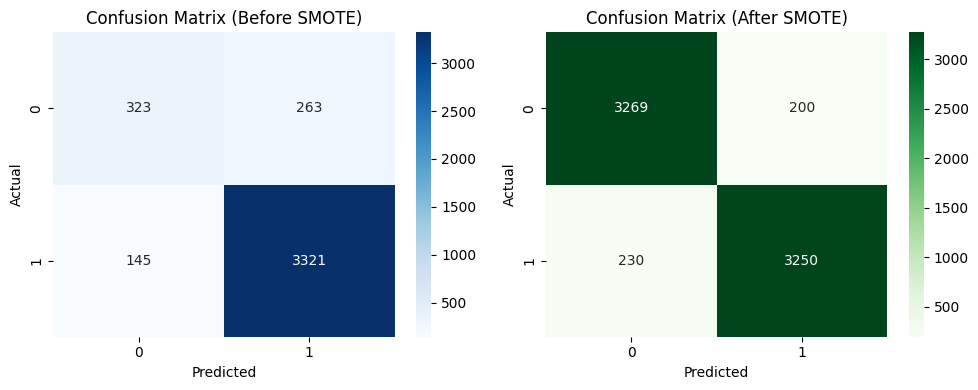

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Before SMOTE
sns.heatmap(cm_before, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix (Before SMOTE)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# After SMOTE
sns.heatmap(cm_after, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix (After SMOTE)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()